In [1]:
# importing the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# creating the dataframe

df = pd.read_csv('perth.houses.csv')

In [3]:
# general info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
# we'll fill the GARAGE section with "0" because the null values
# in this category probably means that there are no garage in those houses
# then, we'll drop the null & duplicates

df['GARAGE'].fillna(0, inplace = True)
df.dropna(inplace=True)
df.drop_duplicates()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
11,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
13,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33646,9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,04-2017\r,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0
33648,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
33649,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0
33650,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997.0,16000,Fremantle Station,1900,02-2019\r,6162,-32.066410,115.756070,FREMANTLE COLLEGE,1.134956,128.0


In [6]:
# describing the categories so we can recognize the patterns

df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,2.069200e+04,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000
mean,6.953816e+05,3.659482,1.842065,2.026629,2625.858689,187.450851,1988.669534,18418.842789,4243.679586,6086.766576,-31.949720,115.866282,1.707341,72.342016
std,3.889216e+05,0.759860,0.594380,1.304464,18925.723037,73.264358,22.154599,10961.968923,4262.402749,65.622427,0.168051,0.110628,1.622978,40.661844
min,5.200000e+04,1.000000,1.000000,0.000000,61.000000,1.000000,1870.000000,1300.000000,46.000000,6003.000000,-32.455550,115.675834,0.070912,1.000000
25%,4.325000e+05,3.000000,1.000000,2.000000,495.000000,133.000000,1977.000000,10200.000000,1600.000000,6030.000000,-32.048106,115.780431,0.865561,39.000000
50%,5.800000e+05,4.000000,2.000000,2.000000,680.000000,177.000000,1994.000000,15900.000000,3000.000000,6066.000000,-31.936975,115.843427,1.304532,65.000000
75%,8.500000e+05,4.000000,2.000000,2.000000,810.000000,228.000000,2005.000000,24400.000000,5100.000000,6150.000000,-31.823725,115.942684,1.969358,105.000000
max,2.440000e+06,10.000000,7.000000,50.000000,999999.000000,849.000000,2017.000000,56900.000000,34300.000000,6558.000000,-31.595910,116.341780,23.254372,139.000000


array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDROOMS'}>,
        <Axes: title={'center': 'BATHROOMS'}>,
        <Axes: title={'center': 'GARAGE'}>],
       [<Axes: title={'center': 'LAND_AREA'}>,
        <Axes: title={'center': 'FLOOR_AREA'}>,
        <Axes: title={'center': 'BUILD_YEAR'}>,
        <Axes: title={'center': 'CBD_DIST'}>],
       [<Axes: title={'center': 'NEAREST_STN_DIST'}>,
        <Axes: title={'center': 'POSTCODE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>],
       [<Axes: title={'center': 'NEAREST_SCH_DIST'}>,
        <Axes: title={'center': 'NEAREST_SCH_RANK'}>, <Axes: >, <Axes: >]],
      dtype=object)

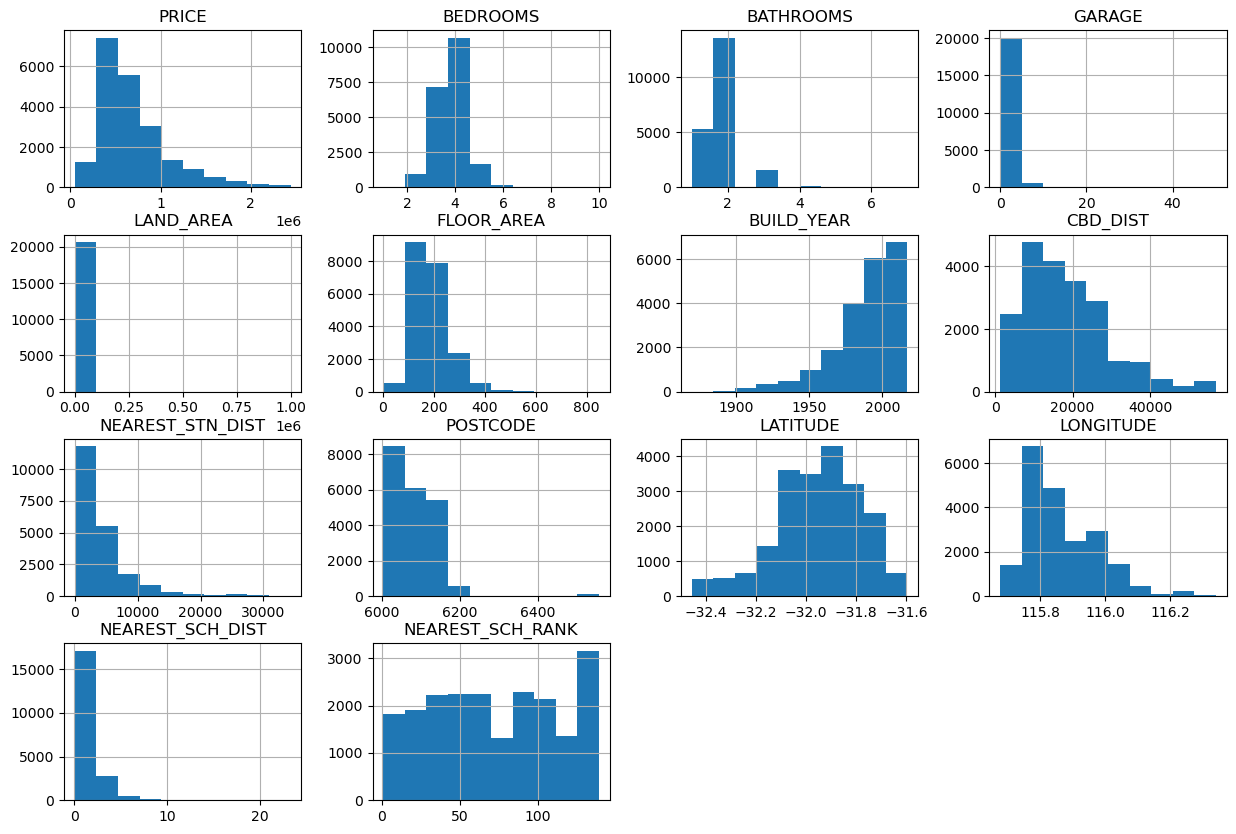

In [7]:
df.hist(figsize=(15,10))

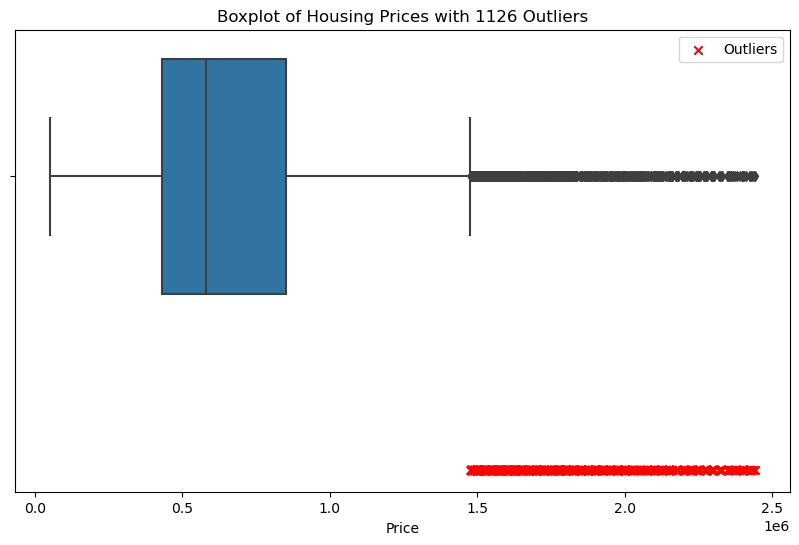

In [9]:
# the information seems very skewed. In order to proceed, we'll analyse
# our outliers and remove them

# Calculate the IQR (Interquartile Range)
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRICE', data=df)

# Highlight outliers
plt.scatter(outliers['PRICE'], np.repeat(1, num_outliers), color='red', marker='x', label='Outliers')

plt.title(f'Boxplot of Housing Prices with {num_outliers} Outliers')
plt.xlabel('Price')
plt.legend()
plt.show()

Iteration 1: Removed 1126 outliers. DataFrame shape: (19566, 19)
Iteration 2: Removed 434 outliers. DataFrame shape: (19132, 19)
Iteration 3: Removed 242 outliers. DataFrame shape: (18890, 19)
Iteration 4: Removed 62 outliers. DataFrame shape: (18828, 19)
No outliers found in iteration 5. Exiting loop.


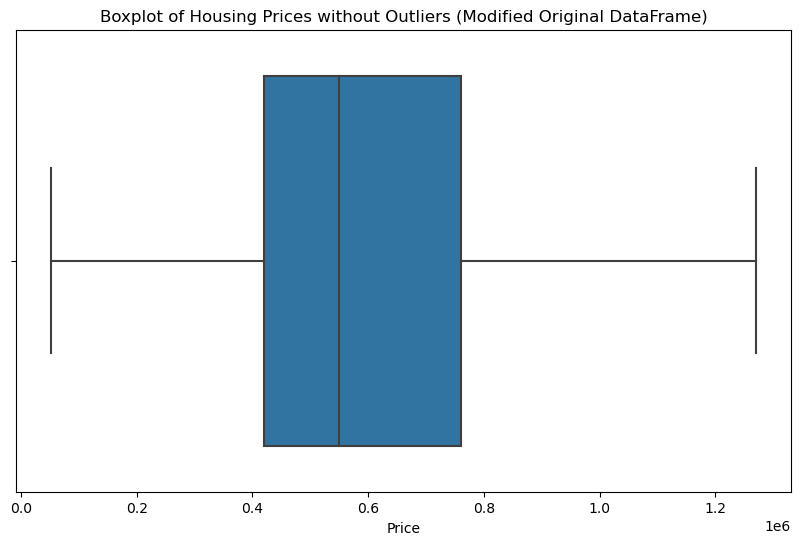

In [10]:
# Set up initial values
max_iterations = 10  # You can adjust this based on your preference
current_iteration = 1

while current_iteration <= max_iterations:
    # Calculate IQR
    Q1 = df['PRICE'].quantile(0.25)
    Q3 = df['PRICE'].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df['PRICE'] < lower_bound) | (df['PRICE'] > upper_bound)]

    # Count the number of outliers
    num_outliers = len(outliers)

    # Break the loop if no new outliers are found
    if num_outliers == 0:
        print(f"No outliers found in iteration {current_iteration}. Exiting loop.")
        break

    # Remove outliers from the original DataFrame
    df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)]

    # Display the updated shape of the DataFrame
    print(f"Iteration {current_iteration}: Removed {num_outliers} outliers. DataFrame shape: {df.shape}")

    # Increment the iteration counter
    current_iteration += 1

# Visualize the final distribution without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRICE', data=df)
plt.title('Boxplot of Housing Prices without Outliers (Modified Original DataFrame)')
plt.xlabel('Price')
plt.show()

In [ ]:
# most of our outliers were houses that were priced in AUD1,5kk, which for
# our analysis doesn't have a great impact, since we want to know the average
# housing price in Perth region.